# Preparación de los datos

In [1]:
# Common imports
import numpy as np
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "javier"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd
import os

def load_bp_data(dataset_name):
    csv_path = os.path.join(os.path.join("datasets", "bloodpressure"), dataset_name)
    return pd.read_csv(csv_path,sep=';')

In [3]:
bp = load_bp_data("database_3.csv")
bp.head()

,alcohol_beer,alcohol_destilled,alcohol_destilledmix,alcohol_other,alcohol_otherfermented,alcohol_wine,alcohol_winemix,birthcountry,birthdate,depression_q1,...,systolic,weather_clouds,weather_feels,weather_humidity,weather_pressure,weather_temp,weather_tempmax,weather_tempmin,weather_windspeed,weight
0,0,0,0,0,0,0,0,Spain,-88909200000,1,...,79,-1.0,-1.00,-1.0,-1.0,-1.00,-1.00,-1.00,-1.00,51
1,0,0,0,0,0,0,0,Spain,-88909200000,2,...,73,0.0,29.49,55.0,1018.0,29.26,29.44,28.89,4.47,51
2,0,0,0,0,0,0,0,Spain,-88909200000,2,...,71,0.0,25.82,52.0,1017.0,25.02,25.56,24.44,0.89,51
3,0,0,0,0,0,0,0,Spain,-88909200000,2,...,80,0.0,27.40,51.0,1016.0,26.29,27.22,25.56,0.89,51
4,0,0,0,0,0,0,0,Spain,-88909200000,2,...,68,0.0,30.58,31.0,1015.0,31.69,32.22,31.11,2.68,51


In [4]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 125 entries, alcohol_beer to weight
dtypes: float64(13), int64(108), object(4)
memory usage: 97.8+ KB


In [5]:
bp_num = bp.drop(["birthcountry","homecountry","educationlevel","gender"], axis=1)
bp_num 

,alcohol_beer,alcohol_destilled,alcohol_destilledmix,alcohol_other,alcohol_otherfermented,alcohol_wine,alcohol_winemix,birthdate,depression_q1,depression_q10,...,systolic,weather_clouds,weather_feels,weather_humidity,weather_pressure,weather_temp,weather_tempmax,weather_tempmin,weather_windspeed,weight
0,0,0,0,0,0,0,0,-88909200000,1,1,...,79,-1.0,-1.00,-1.0,-1.0,-1.00,-1.00,-1.00,-1.00,51
1,0,0,0,0,0,0,0,-88909200000,2,1,...,73,0.0,29.49,55.0,1018.0,29.26,29.44,28.89,4.47,51
2,0,0,0,0,0,0,0,-88909200000,2,1,...,71,0.0,25.82,52.0,1017.0,25.02,25.56,24.44,0.89,51
3,0,0,0,0,0,0,0,-88909200000,2,1,...,80,0.0,27.40,51.0,1016.0,26.29,27.22,25.56,0.89,51
4,0,0,0,0,0,0,0,-88909200000,2,1,...,68,0.0,30.58,31.0,1015.0,31.69,32.22,31.11,2.68,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,-88909200000,1,2,...,63,23.0,27.31,58.0,1016.0,26.11,26.11,26.11,1.79,51
96,0,0,0,0,0,0,0,-88909200000,1,2,...,64,54.0,27.82,61.0,1016.0,25.56,25.56,25.56,0.45,51
97,0,0,0,0,0,0,0,-88909200000,1,2,...,75,0.0,36.89,27.0,1015.0,36.67,36.67,36.67,1.79,51
98,0,0,0,0,0,0,0,-88909200000,1,2,...,65,0.0,40.30,20.0,1014.0,40.56,40.56,40.56,1.79,51


In [6]:
bp_cat = bp[["birthcountry","homecountry","educationlevel","gender"]]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

bp_cat_1hot = cat_encoder.fit_transform(bp_cat)
bp_cat_1hot.toarray()

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],


In [7]:
bp_cat_1hot

<100x4 sparse matrix of type '<class 'numpy.float64'>'
	with 400 stored elements in Compressed Sparse Row format>

In [8]:
bp_cat_tranf = pd.DataFrame(bp_cat_1hot.toarray(), columns = ["birthcountry","homecountry","educationlevel","gender"]) 

bp_cat_tranf

,birthcountry,homecountry,educationlevel,gender
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
95,1.0,1.0,1.0,1.0
96,1.0,1.0,1.0,1.0
97,1.0,1.0,1.0,1.0
98,1.0,1.0,1.0,1.0


In [9]:
bp = pd.concat([bp_num, bp_cat_tranf], axis=1, join='inner')

In [10]:
bp.head()

,alcohol_beer,alcohol_destilled,alcohol_destilledmix,alcohol_other,alcohol_otherfermented,alcohol_wine,alcohol_winemix,birthdate,depression_q1,depression_q10,...,weather_pressure,weather_temp,weather_tempmax,weather_tempmin,weather_windspeed,weight,birthcountry,homecountry,educationlevel,gender
0,0,0,0,0,0,0,0,-88909200000,1,1,...,-1.0,-1.00,-1.00,-1.00,-1.00,51,1.0,1.0,1.0,1.0
1,0,0,0,0,0,0,0,-88909200000,2,1,...,1018.0,29.26,29.44,28.89,4.47,51,1.0,1.0,1.0,1.0
2,0,0,0,0,0,0,0,-88909200000,2,1,...,1017.0,25.02,25.56,24.44,0.89,51,1.0,1.0,1.0,1.0
3,0,0,0,0,0,0,0,-88909200000,2,1,...,1016.0,26.29,27.22,25.56,0.89,51,1.0,1.0,1.0,1.0
4,0,0,0,0,0,0,0,-88909200000,2,1,...,1015.0,31.69,32.22,31.11,2.68,51,1.0,1.0,1.0,1.0


In [11]:
bp.describe()

,alcohol_beer,alcohol_destilled,alcohol_destilledmix,alcohol_other,alcohol_otherfermented,alcohol_wine,alcohol_winemix,birthdate,depression_q1,depression_q10,...,weather_pressure,weather_temp,weather_tempmax,weather_tempmin,weather_windspeed,weight,birthcountry,homecountry,educationlevel,gender
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.000000e+02,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.890920e+10,1.950000,1.680000,...,1006.340000,27.180600,27.840700,26.595500,1.792000,51.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.687184,0.468826,...,101.786588,4.590267,4.723868,4.556384,1.399846,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.890920e+10,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,51.0,1.0,1.0,1.0,1.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.890920e+10,1.000000,1.000000,...,1015.000000,24.440000,25.000000,23.890000,0.487500,51.0,1.0,1.0,1.0,1.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.890920e+10,2.000000,2.000000,...,1016.000000,26.460000,27.220000,26.110000,1.340000,51.0,1.0,1.0,1.0,1.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.890920e+10,2.000000,2.000000,...,1019.000000,29.620000,30.670000,28.890000,2.680000,51.0,1.0,1.0,1.0,1.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.890920e+10,3.000000,2.000000,...,1023.000000,40.560000,40.560000,40.560000,6.200000,51.0,1.0,1.0,1.0,1.0


In [12]:
import matplotlib.pyplot as plt

'''
plots_path = "plots/"
if not os.path.exists(plots_path):
    os.makedirs(plots_path)
    
bp.hist(bins=50, grid=False, figsize=(50,40))
plt.savefig(plots_path + "database_1.pdf")
plt.close()'''

'\nplots_path = "plots/"\nif not os.path.exists(plots_path):\n    os.makedirs(plots_path)\n    \nbp.hist(bins=50, grid=False, figsize=(50,40))\nplt.savefig(plots_path + "database_1.pdf")\nplt.close()'

In [12]:
bp = bp[bp.columns.drop(list(bp.filter(regex='alcohol_')))]
bp = bp[bp.columns.drop(list(bp.filter(regex='pollution_')))]
bp = bp.drop("birthcountry", axis=1)
bp = bp.drop("gender", axis=1)
bp = bp.drop("birthdate", axis=1)
bp = bp.drop("educationlevel", axis=1)
bp = bp.drop("homecountry", axis=1)
bp = bp.drop("height", axis=1)
bp = bp.drop("weight", axis=1)
bp = bp.drop("depression_q6", axis=1)
bp = bp[bp.columns.drop(list(bp.filter(regex='diet_').drop(["diet_q3","diet_q13"], axis=1)))]

bp = bp.drop(['med_Paracetamol', 'med_Ibuprofeno', 'med_Dexketoprofeno', 'med_Metamizol', 'med_Morfina',  'med_Fentanil', 'med_Tramadol', 'med_Nitroglicerina', 'med_Verapamilo', 'med_Nifedipino', 'med_Porpanolol', 'med_Atenolol', 'med_Labetalol',  'med_Amiodarona', 'med_Lidocaina', 'med_Adenosina', 'med_Digoxina', 'med_Sulfato de magnesio', 'med_Insulina', 'med_Glucagon',  'med_Lercanidipino', 'med_Acenocumarol', 'med_Alprazolam', 'med_Midazolam', 'med_Diazepam', 'med_Lorazepam', 'med_Lormetazepam',  'med_Clorazepato dipotasico', 'med_Sertralina', 'med_Zolpidem', 'med_Dimenhidrinato', 'med_Doxilamina', 'med_Difenhidramina',  'med_Dimenhidrinato', 'med_Hidroxicina', 'med_Cetirizina'], axis=1)
bp = bp.drop("smoke_other", axis=1)
bp = bp.drop(["social_q4","social_q7"], axis=1)
bp = bp.drop(["stress_q7","stress_q13"], axis=1)

In [13]:
bp

,depression_q1,depression_q10,depression_q2,depression_q3,depression_q4,depression_q5,depression_q7,depression_q8,depression_q9,diastolic,...,stress_q9,systolic,weather_clouds,weather_feels,weather_humidity,weather_pressure,weather_temp,weather_tempmax,weather_tempmin,weather_windspeed
0,1,1,1,2,2,3,2,3,1,124,...,4,79,-1.0,-1.00,-1.0,-1.0,-1.00,-1.00,-1.00,-1.00
1,2,1,1,2,2,2,2,3,1,122,...,4,73,0.0,29.49,55.0,1018.0,29.26,29.44,28.89,4.47
2,2,1,1,2,2,2,2,3,1,118,...,4,71,0.0,25.82,52.0,1017.0,25.02,25.56,24.44,0.89
3,2,1,1,2,2,2,2,3,1,124,...,4,80,0.0,27.40,51.0,1016.0,26.29,27.22,25.56,0.89
4,2,1,1,2,2,2,2,3,1,119,...,4,68,0.0,30.58,31.0,1015.0,31.69,32.22,31.11,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,1,2,2,2,2,3,2,110,...,4,63,23.0,27.31,58.0,1016.0,26.11,26.11,26.11,1.79
96,1,2,1,3,2,2,2,3,2,109,...,4,64,54.0,27.82,61.0,1016.0,25.56,25.56,25.56,0.45
97,1,2,1,3,2,2,2,3,2,112,...,4,75,0.0,36.89,27.0,1015.0,36.67,36.67,36.67,1.79
98,1,2,1,3,2,2,2,3,2,112,...,4,65,0.0,40.30,20.0,1014.0,40.56,40.56,40.56,1.79


In [15]:
'''bp.hist(bins=50, grid=False, figsize=(50,40))
plt.savefig(plots_path + "database_1_clear.pdf")
plt.close()'''

'bp.hist(bins=50, grid=False, figsize=(50,40))\nplt.savefig(plots_path + "database_1_clear.pdf")\nplt.close()'

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bp, test_size=0.2, random_state=42)

In [15]:
test_set.head()

,depression_q1,depression_q10,depression_q2,depression_q3,depression_q4,depression_q5,depression_q7,depression_q8,depression_q9,diastolic,...,stress_q9,systolic,weather_clouds,weather_feels,weather_humidity,weather_pressure,weather_temp,weather_tempmax,weather_tempmin,weather_windspeed
83,1,2,1,2,2,2,2,3,2,113,...,3,70,0.0,32.99,36.0,1014.0,33.68,35.00,32.78,4.10
53,2,2,2,2,2,2,2,2,2,120,...,3,70,0.0,24.76,74.0,1020.0,23.11,23.89,22.22,1.76
70,2,2,2,2,2,2,2,2,2,107,...,3,66,0.0,31.82,51.0,1015.0,31.29,32.22,30.56,4.47
45,3,2,2,4,4,2,3,2,2,116,...,3,75,20.0,29.54,69.0,1016.0,26.18,27.22,25.00,0.50
44,3,2,2,4,4,2,3,2,2,114,...,3,75,0.0,28.06,66.0,1017.0,25.35,26.11,24.44,0.45


In [16]:
bp = train_set.drop(["diastolic","systolic"], axis=1)

bp_label_dia = train_set["diastolic"].copy()
bp_label_sys = train_set["systolic"].copy()
bp_labels = train_set[["diastolic","systolic"]].copy()

In [17]:
bp

,depression_q1,depression_q10,depression_q2,depression_q3,depression_q4,depression_q5,depression_q7,depression_q8,depression_q9,diet_q13,...,stress_q8,stress_q9,weather_clouds,weather_feels,weather_humidity,weather_pressure,weather_temp,weather_tempmax,weather_tempmin,weather_windspeed
55,2,2,2,2,2,2,2,2,2,1,...,4,3,0.0,24.76,74.0,1020.0,23.11,23.89,22.22,1.76
88,1,2,1,2,2,2,2,3,2,0,...,3,3,0.0,29.82,42.0,1013.0,28.70,29.44,28.33,0.45
26,2,1,1,2,2,2,2,3,1,0,...,4,4,0.0,26.60,67.0,1018.0,24.24,24.44,23.89,0.45
42,3,2,2,4,4,2,3,2,2,0,...,5,3,0.0,26.38,74.0,1019.0,24.04,25.00,23.33,1.34
69,2,2,2,2,2,2,2,2,2,1,...,4,3,0.0,31.76,55.0,1016.0,28.88,29.44,28.33,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2,2,2,2,2,2,2,2,2,1,...,4,3,0.0,30.00,65.0,1015.0,27.22,27.78,26.67,1.34
71,2,2,2,2,2,2,2,2,2,1,...,4,3,0.0,26.87,65.0,1017.0,24.80,25.00,24.44,0.89
14,2,1,1,2,2,2,2,3,1,0,...,4,4,25.0,26.76,84.0,1021.0,23.63,24.44,22.22,1.34
92,1,2,1,2,2,2,2,3,2,0,...,3,3,0.0,35.20,50.0,1015.0,32.22,32.22,32.22,1.34


In [18]:
bp_label_dia

55    124
88    121
26    103
42    130
69    113
     ... 
60    119
71    111
14    111
92    104
51    125
Name: diastolic, Length: 80, dtype: int64

In [19]:
bp_label_sys

55    80
88    86
26    72
42    85
69    76
      ..
60    72
71    74
14    74
92    59
51    71
Name: systolic, Length: 80, dtype: int64

In [20]:
bp_labels

,diastolic,systolic
55,124,80
88,121,86
26,103,72
42,130,85
69,113,76
...,...,...
60,119,72
71,111,74
14,111,74
92,104,59


In [21]:
attribs = list(bp)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


bp_prepared = pipeline.fit_transform(bp)

bp_prepared

array([[ 0.05522512,  0.65465367,  1.1055416 , ..., -1.06288182,
        -1.20349932,  0.01683822],
       [-1.41744469,  0.65465367, -0.90453403, ...,  0.47878466,
         0.48775925, -0.96352009],
       [ 0.05522512, -1.52752523, -0.90453403, ..., -0.91010406,
        -0.74124043, -0.96352009],
       ...,
       [ 0.05522512, -1.52752523, -0.90453403, ..., -0.91010406,
        -1.20349932, -0.29747513],
       [-1.41744469,  0.65465367, -0.90453403, ...,  1.25100679,
         1.56451798, -0.29747513],
       [ 1.52789492,  0.65465367,  1.1055416 , ..., -1.06288182,
        -1.20349932,  0.01683822]])

In [23]:
bp_prepared.shape

(80, 51)

In [24]:
type(bp_prepared)

numpy.ndarray

# Algoritmos Machine Learning

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(bp_prepared, bp_labels)

some_data = bp.iloc[:5]
some_labels = bp_labels.iloc[:5]
some_data_prepared = pipeline.transform(some_data)

In [26]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [[124.61842234  83.1075648 ]
 [123.02888567  80.73013857]
 [105.9626298   72.3073247 ]
 [126.70623978  83.6234325 ]
 [113.52814326  73.77476495]]


In [27]:
print("Labels:", some_labels)

Labels:     diastolic  systolic
55        124        80
88        121        86
26        103        72
42        130        85
69        113        76


In [28]:
from sklearn.metrics import mean_squared_error

bp_predictions = lin_reg.predict(bp_prepared)
lin_mse = mean_squared_error(bp_labels, bp_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.622231955109994

In [31]:
final_model = lin_reg

X_test = test_set.drop(["diastolic","systolic"], axis=1)
y_test = test_set[["diastolic","systolic"]].copy()

X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

103542701623870.92

In [29]:


rmses = []
degrees = np.arange(1, 3)
min_rmse, min_deg = 1e10, 0

X = bp_prepared.copy()
y = bp_labels.copy()

for deg in degrees:

    poly_reg = make_pipeline(PolynomialFeatures(deg),LinearRegression())

    poly_reg.fit(X, y)

    bp_predictions = poly_reg.predict(X)
    lin_mse = mean_squared_error(y, bp_predictions)
    lin_rmse = np.sqrt(lin_mse)

    X_test = test_set.drop(["diastolic","systolic"], axis=1)
    y_test = test_set[["diastolic","systolic"]].copy()

    X_test_prepared = pipeline.transform(X_test)
    final_predictions = poly_reg.predict(X_test_prepared)

    final_mse = mean_squared_error(y_test, final_predictions)
    final_rmse = np.sqrt(final_mse)
    
    # Cross-validation of degree
    if min_rmse > final_rmse:
        min_rmse = final_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

NameError: name 'make_pipeline' is not defined

In [246]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(bp_prepared, bp_labels)

bp_predictions = tree_reg.predict(bp_prepared)
tree_mse = mean_squared_error(bp_labels, bp_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [247]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, bp_prepared, bp_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [248]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [6.93271231 6.33936117 6.2299679  5.15994186 5.4025457  5.26189129
 8.16624149 7.88307409 8.59817256 7.65786244]
Mean: 6.763177080758292
Standard deviation: 1.2065920378215311


In [249]:
lin_scores = cross_val_score(lin_reg, bp_prepared, bp_labels, scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.10863693 7.34325361 5.21108542 7.54974773 6.39302146]
Mean: 6.521149029075673
Standard deviation: 0.8528447459399418


In [250]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(bp_prepared, bp_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [251]:
bp_predictions = forest_reg.predict(bp_prepared)
forest_mse = mean_squared_error(bp_labels, bp_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.5946373267073115

In [252]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, bp_prepared, bp_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [5.3509929  5.07155055 6.57941867 5.77370115 4.8900409  4.99011523
 6.57880118 7.84187478 5.56372178 7.16977784]
Mean: 5.9809994974209655
Standard deviation: 0.9594094227291962


In [253]:
scores = cross_val_score(lin_reg, bp_prepared, bp_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     2.245439e+13
std      7.100702e+13
min      5.068311e+00
25%      5.299657e+00
50%      6.259786e+00
75%      8.678140e+00
max      2.245439e+14
dtype: float64

In [255]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(bp_prepared, bp_label_dia)
bp_predictions = svm_reg.predict(bp_prepared)
svm_mse = mean_squared_error(bp_label_dia, bp_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

5.570527261475235

In [254]:
from sklearn.svm import SVR

#SVM solo acepta un array de una dimensión, no se pueden tener las dos labels

svm_reg = SVR(kernel="linear")
svm_reg.fit(bp_prepared, bp_label_sys)
bp_predictions = svm_reg.predict(bp_prepared)
svm_mse = mean_squared_error(bp_label_sys, bp_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

4.2042483899851275

In [256]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = [
    # try 12 (3×10) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 12, 16, 22, 28, 32, 34]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(bp_prepared, bp_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 12, 16, 22, 28, 32, 34],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
grid_search.best_params_

{'max_features': 22, 'n_estimators': 30}

In [105]:
grid_search.best_estimator_

RandomForestRegressor(max_features=22, n_estimators=30, random_state=42)

In [106]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7.908030377056252 {'max_features': 2, 'n_estimators': 3}
6.806454963243838 {'max_features': 2, 'n_estimators': 10}
6.57798875881611 {'max_features': 2, 'n_estimators': 30}
7.646582993826816 {'max_features': 4, 'n_estimators': 3}
7.0748183133326235 {'max_features': 4, 'n_estimators': 10}
6.29599155989128 {'max_features': 4, 'n_estimators': 30}
7.568972972065091 {'max_features': 6, 'n_estimators': 3}
6.411485462303828 {'max_features': 6, 'n_estimators': 10}
5.918804113132115 {'max_features': 6, 'n_estimators': 30}
6.847028958282238 {'max_features': 8, 'n_estimators': 3}
6.204441957178744 {'max_features': 8, 'n_estimators': 10}
5.965201713394231 {'max_features': 8, 'n_estimators': 30}
6.982511221828646 {'max_features': 12, 'n_estimators': 3}
6.287980597934444 {'max_features': 12, 'n_estimators': 10}
5.829458872034414 {'max_features': 12, 'n_estimators': 30}
7.311397115310983 {'max_features': 16, 'n_estimators': 3}
6.44582487609874 {'max_features': 16, 'n_estimators': 10}
5.646900780598675

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=34),
    }


forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(bp_prepared, bp_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f03b30794a8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f03b433d630>},
                   random_state=42, scoring='neg_mean_squared_error')

In [112]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.773955894070085 {'max_features': 29, 'n_estimators': 15}
5.653622624179119 {'max_features': 8, 'n_estimators': 189}
5.43940179571671 {'max_features': 21, 'n_estimators': 103}
5.510886760666463 {'max_features': 19, 'n_estimators': 75}
5.640624296509499 {'max_features': 11, 'n_estimators': 88}
5.4736621171736 {'max_features': 24, 'n_estimators': 131}
5.46559060571475 {'max_features': 22, 'n_estimators': 53}
6.423308903092619 {'max_features': 2, 'n_estimators': 88}
5.55530188036568 {'max_features': 30, 'n_estimators': 38}
6.385358116015603 {'max_features': 2, 'n_estimators': 192}


In [113]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=21, n_estimators=103, random_state=42)

In [114]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.91098328e-03, 4.10965028e-03, 8.29675890e-04, 1.39248008e-01,
       1.54205154e-02, 6.21208985e-04, 2.99109185e-04, 6.16578968e-03,
       1.70438933e-02, 3.42863281e-02, 8.66160114e-02, 2.48255190e-03,
       3.63564182e-03, 2.98796859e-03, 0.00000000e+00, 3.30381922e-01,
       1.73051720e-03, 1.24714656e-03, 8.66086924e-04, 1.19012752e-03,
       3.65736238e-03, 2.78235503e-03, 8.35309792e-04, 7.14696660e-04,
       4.51423938e-04, 6.08808094e-03, 3.70453119e-02, 6.36272849e-02,
       5.23255562e-02, 3.90706182e-02, 2.73079141e-02, 4.95875301e-02,
       2.78880512e-02, 3.65453681e-02])

In [115]:
sorted(zip(feature_importances, attribs), reverse=True)

[(0.33038192211073647, 'steps'),
 (0.13924800846556093, 'measurementtime'),
 (0.08661601144450774, 'pulse'),
 (0.06362728489729598, 'weather_feels'),
 (0.052325556214672976, 'weather_humidity'),
 (0.04958753005932713, 'weather_tempmax'),
 (0.039070618228063694, 'weather_pressure'),
 (0.037045311909327146, 'weather_clouds'),
 (0.03654536814958285, 'weather_windspeed'),
 (0.034286328061109005, 'physical_q7'),
 (0.027888051197771976, 'weather_tempmin'),
 (0.027307914052779787, 'weather_temp'),
 (0.01704389327420666, 'physical_q6'),
 (0.01542051537898769, 'med_Hidroclorotiazida'),
 (0.006165789680378475, 'physical_q5'),
 (0.006088080936466743, 'stress_q9'),
 (0.0041096502780962, 'depression_q7'),
 (0.003657362378575923, 'stress_q13'),
 (0.003635641818568258, 'social_q5'),
 (0.002987968586174973, 'social_q6'),
 (0.002910983280886186, 'depression_q1'),
 (0.0027823550344998685, 'stress_q14'),
 (0.0024825519036748497, 'social_q2'),
 (0.001730517204648306, 'stress_q1'),
 (0.0012471465624830415,

In [116]:
final_model = rnd_search.best_estimator_

X_test = test_set.drop(["diastolic","systolic"], axis=1)
y_test = test_set[["diastolic","systolic"]].copy()

X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [117]:
final_rmse

6.242929075852987

In [125]:
svm_reg.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [148]:
param_distribs = {
        'kernel': ['linear'], 
        'gamma': randint(1e-4, 1e+4),
        'C': randint(1e+0,1e+2)
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(bp_prepared, bp_label_sys)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f03b741a5c0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f03b741a7b8>,
                                        'kernel': ['linear']},
                   random_state=42, scoring='neg_mean_squared_error')

In [149]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.678862418284766 {'C': 52, 'gamma': 860, 'kernel': 'linear'}
5.659029169243605 {'C': 15, 'gamma': 5191, 'kernel': 'linear'}
5.694143457229761 {'C': 61, 'gamma': 5734, 'kernel': 'linear'}
5.6982352510326795 {'C': 83, 'gamma': 4426, 'kernel': 'linear'}
5.688607150560332 {'C': 75, 'gamma': 8322, 'kernel': 'linear'}
5.68055647073023 {'C': 22, 'gamma': 769, 'kernel': 'linear'}
5.687525447727332 {'C': 88, 'gamma': 6949, 'kernel': 'linear'}
5.47597974471586 {'C': 2, 'gamma': 5311, 'kernel': 'linear'}
5.692930355012847 {'C': 60, 'gamma': 6420, 'kernel': 'linear'}
5.673051893442013 {'C': 33, 'gamma': 4555, 'kernel': 'linear'}


In [142]:
param_dist = {'max_depth': randint(2, 80),
              'min_samples_split': randint(2, 80),
              'max_features': randint(1, 34),}

tree_reg = DecisionTreeRegressor(random_state=42)
tree_search = RandomizedSearchCV(tree_reg, param_distributions=param_dist,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
tree_search.fit(bp_prepared, bp_labels)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f03b5869320>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f03b5869f60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f03b5869588>},
                   random_state=42, scoring='neg_mean_squared_error')

In [143]:
cvres = tree_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

6.090471264733387 {'max_depth': 53, 'max_features': 29, 'min_samples_split': 16}
6.96342410469279 {'max_depth': 73, 'max_features': 21, 'min_samples_split': 76}
5.532351242439962 {'max_depth': 76, 'max_features': 24, 'min_samples_split': 25}
5.780419925081473 {'max_depth': 4, 'max_features': 22, 'min_samples_split': 54}
5.490946052599957 {'max_depth': 3, 'max_features': 24, 'min_samples_split': 31}
6.96342410469279 {'max_depth': 39, 'max_features': 2, 'min_samples_split': 65}
5.490946052599957 {'max_depth': 61, 'max_features': 21, 'min_samples_split': 34}
5.780419925081473 {'max_depth': 77, 'max_features': 22, 'min_samples_split': 50}
5.780419925081473 {'max_depth': 60, 'max_features': 28, 'min_samples_split': 61}
6.834794890884523 {'max_depth': 16, 'max_features': 3, 'min_samples_split': 52}
6.96342410469279 {'max_depth': 8, 'max_features': 21, 'min_samples_split': 74}
7.494293546685296 {'max_depth': 40, 'max_features': 18, 'min_samples_split': 5}
7.09327437549327 {'max_depth': 61, 'm

In [144]:
tree_search.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=24, min_samples_split=31,
                      random_state=42)

In [145]:
feature_importances = tree_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, attribs), reverse=True)

[(0.7487862256343347, 'steps'),
 (0.2512137743656652, 'measurementtime'),
 (0.0, 'weather_windspeed'),
 (0.0, 'weather_tempmin'),
 (0.0, 'weather_tempmax'),
 (0.0, 'weather_temp'),
 (0.0, 'weather_pressure'),
 (0.0, 'weather_humidity'),
 (0.0, 'weather_feels'),
 (0.0, 'weather_clouds'),
 (0.0, 'stress_q9'),
 (0.0, 'stress_q7'),
 (0.0, 'stress_q6'),
 (0.0, 'stress_q2'),
 (0.0, 'stress_q14'),
 (0.0, 'stress_q13'),
 (0.0, 'stress_q12'),
 (0.0, 'stress_q11'),
 (0.0, 'stress_q10'),
 (0.0, 'stress_q1'),
 (0.0, 'social_q7'),
 (0.0, 'social_q6'),
 (0.0, 'social_q5'),
 (0.0, 'social_q2'),
 (0.0, 'pulse'),
 (0.0, 'physical_q7'),
 (0.0, 'physical_q6'),
 (0.0, 'physical_q5'),
 (0.0, 'physical_q4'),
 (0.0, 'physical_q3'),
 (0.0, 'med_Hidroclorotiazida'),
 (0.0, 'depression_q8'),
 (0.0, 'depression_q7'),
 (0.0, 'depression_q1')]

In [146]:
final_model = tree_search.best_estimator_

X_test = test_set.drop(["diastolic","systolic"], axis=1)
y_test = test_set[["diastolic","systolic"]].copy()

X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [147]:
final_rmse

7.864674944281524

In [30]:
clf.get_params().keys()

dict_keys(['alpha_1', 'alpha_2', 'alpha_init', 'compute_score', 'copy_X', 'fit_intercept', 'lambda_1', 'lambda_2', 'lambda_init', 'n_iter', 'normalize', 'tol', 'verbose'])

In [35]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import BayesianRidge

param_dist = {'n_iter': randint(50, 800),}

br_reg = BayesianRidge(compute_score=True)
br_search = RandomizedSearchCV(br_reg, param_distributions=param_dist,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
br_search.fit(bp_prepared, bp_label_sys)

RandomizedSearchCV(cv=5, estimator=BayesianRidge(compute_score=True), n_iter=50,
                   param_distributions={'n_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4329356d8>},
                   random_state=42, scoring='neg_mean_squared_error')

In [37]:
cvres = br_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.509038030398113 {'n_iter': 152}
5.509038030398113 {'n_iter': 485}
5.509038030398113 {'n_iter': 320}
5.509038030398113 {'n_iter': 156}
5.509038030398113 {'n_iter': 121}
5.509038030398113 {'n_iter': 750}
5.505156445569792 {'n_iter': 70}
5.509038030398113 {'n_iter': 664}
5.509038030398113 {'n_iter': 171}
5.509038030398113 {'n_iter': 516}
5.509038030398113 {'n_iter': 264}
5.509038030398113 {'n_iter': 380}
5.509038030398113 {'n_iter': 508}
5.509038030398113 {'n_iter': 137}
5.509038030398113 {'n_iter': 422}
5.509038030398113 {'n_iter': 149}
5.509038030398113 {'n_iter': 713}
5.509038030398113 {'n_iter': 180}
5.509038030398113 {'n_iter': 711}
5.509038030398113 {'n_iter': 358}
5.509038030398113 {'n_iter': 393}
5.509038030398113 {'n_iter': 541}
5.509038030398113 {'n_iter': 463}
5.509038030398113 {'n_iter': 435}
5.509038030398113 {'n_iter': 241}
5.509038030398113 {'n_iter': 326}
5.509038030398113 {'n_iter': 210}
5.509038030398113 {'n_iter': 509}
5.509038030398113 {'n_iter': 363}
5.5053432097069

In [38]:
br_search.best_estimator_

BayesianRidge(compute_score=True, n_iter=70)

Feature: 0, Score: -0.08316
Feature: 1, Score: -0.08316
Feature: 2, Score: 0.01208
Feature: 3, Score: -0.10049
Feature: 4, Score: 0.03235
Feature: 5, Score: -0.01348
Feature: 6, Score: -0.01348
Feature: 7, Score: 0.22894
Feature: 8, Score: 0.03153
Feature: 9, Score: -0.03342
Feature: 10, Score: 0.06330
Feature: 11, Score: -0.10017
Feature: 12, Score: -0.22566
Feature: 13, Score: -0.10017
Feature: 14, Score: -0.00000
Feature: 15, Score: -1.49151
Feature: 16, Score: -0.11280
Feature: 17, Score: 0.18933
Feature: 18, Score: 0.12643
Feature: 19, Score: -0.05698
Feature: 20, Score: -0.01617
Feature: 21, Score: -0.12931
Feature: 22, Score: 0.02235
Feature: 23, Score: 0.07139
Feature: 24, Score: 0.03090
Feature: 25, Score: 0.19107
Feature: 26, Score: -0.46820
Feature: 27, Score: -0.51675
Feature: 28, Score: -0.71659
Feature: 29, Score: 0.07221
Feature: 30, Score: -0.18108
Feature: 31, Score: -0.11815
Feature: 32, Score: -0.19347
Feature: 33, Score: -0.19182


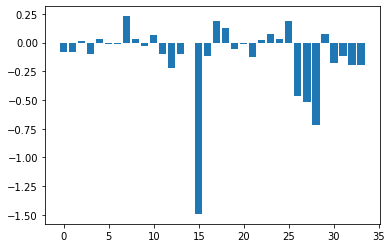

In [41]:
from matplotlib import pyplot

importance = br_search.best_estimator_.coef_
# summarize feature importance
for i,v in enumerate(importance):
    
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [42]:
sorted(zip(importance, attribs), reverse=True)

[(0.2289447311532103, 'physical_q5'),
 (0.19107196318974168, 'stress_q9'),
 (0.18932642571617425, 'stress_q10'),
 (0.12643273823543977, 'stress_q11'),
 (0.07221462511144888, 'weather_pressure'),
 (0.07139048665764532, 'stress_q6'),
 (0.06329982763910616, 'pulse'),
 (0.03234696245420432, 'med_Hidroclorotiazida'),
 (0.03152856720901864, 'physical_q6'),
 (0.030898775641272858, 'stress_q7'),
 (0.022354972228091463, 'stress_q2'),
 (0.01208017493843852, 'depression_q8'),
 (-4.327982798220564e-18, 'social_q7'),
 (-0.01348483367452441, 'physical_q4'),
 (-0.013484833674525382, 'physical_q3'),
 (-0.016165954410660238, 'stress_q13'),
 (-0.03342098304979879, 'physical_q7'),
 (-0.056977879851386914, 'stress_q12'),
 (-0.08315792437340769, 'depression_q7'),
 (-0.08315792437340846, 'depression_q1'),
 (-0.10016905431499337, 'social_q2'),
 (-0.10016905431499365, 'social_q6'),
 (-0.10048898867491868, 'measurementtime'),
 (-0.11280422610495078, 'stress_q1'),
 (-0.11814766884436895, 'weather_tempmax'),
 (-